# Aircraft Wildlife Strikes Analysis

This project is an attempt to analyze the collisions which happened between aircrafts and wildlife (also known as Aircraft Wildlife Strikes) from 1990 to 2015. This dataset was compiled from reports received from airports, airlines, and pilots and published by the U.S. Federal Aviation Association. Keep in mind that as the dataset is old and with recent improvements in technology, it may be possible that previous trends might have changed. This dataset was downloaded from [Kaggle datasets](https://www.kaggle.com/faa/wildlife-strikes).

This dataset contains the incident date, aircraft operator, aircraft height and speed, number of engines and model, airport name and location, species name and quantity, and aircraft damage and many more details. This project is a part of [the course](http://zerotopandas.com) which teaches how how to analyze a dataset for beginners starting with Python, Numpy, Pandas and ending with Exploratory Data Analysis and making inferences.

We will upload our Jupyter notebook to [Jovian.ml](https://jovian.ml).

## Data Preparation and Cleaning

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 '.jovianrc',
 'archive.zip',
 'database.csv',
 'numpy-array-operations.ipynb',
 'pandas-practice-assignment.ipynb',
 'zerotopandas-course-project.ipynb']

In [3]:
strikes_df = pd.read_csv('database.csv', low_memory=False)
strikes_df.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0


In [4]:
strikes_df.shape

(174104, 66)

So there are records of 174104 strikes (number of rows) and 66 columns in the dataset that describe each aircraft wildlife strike. 

In [5]:
strikes_df.columns

Index(['Record ID', 'Incident Year', 'Incident Month', 'Incident Day',
       'Operator ID', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make',
       'Aircraft Model', 'Aircraft Mass', 'Engine Make', 'Engine Model',
       'Engines', 'Engine Type', 'Engine1 Position', 'Engine2 Position',
       'Engine3 Position', 'Engine4 Position', 'Airport ID', 'Airport',
       'State', 'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility',
       'Precipitation', 'Height', 'Speed', 'Distance', 'Species ID',
       'Species Name', 'Species Quantity', 'Flight Impact', 'Fatalities',
       'Injuries', 'Aircraft Damage', 'Radome Strike', 'Radome Damage',
       'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage',
       'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage',
       'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Strike', 'Propeller Damage',
       'Wing or Rotor Strike', 'Win

These columns are the features that describes each incident of an aircraft wildlife strike.

In [6]:
strikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 66 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Record ID             174104 non-null  int64  
 1   Incident Year         174104 non-null  int64  
 2   Incident Month        174104 non-null  int64  
 3   Incident Day          174104 non-null  int64  
 4   Operator ID           174104 non-null  object 
 5   Operator              174104 non-null  object 
 6   Aircraft              174104 non-null  object 
 7   Aircraft Type         133074 non-null  object 
 8   Aircraft Make         131051 non-null  object 
 9   Aircraft Model        122439 non-null  object 
 10  Aircraft Mass         127320 non-null  float64
 11  Engine Make           123434 non-null  float64
 12  Engine Model          121988 non-null  object 
 13  Engines               127342 non-null  float64
 14  Engine Type           127282 non-null  object 
 15  

In [7]:
strikes_df.describe()

,Record ID,Incident Year,Incident Month,Incident Day,Aircraft Mass,Engine Make,Engines,Engine2 Position,Engine4 Position,Height,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
count,174104.000000,174104.000000,174104.000000,174104.000000,127320.000000,123434.000000,127342.000000,118715.000000,3092.000000,103677.000000,...,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000
mean,241204.036915,2006.036392,7.171840,15.712264,3.510611,21.306958,2.057656,2.918570,2.058538,831.032283,...,0.102703,0.004733,0.046242,0.005813,0.011235,0.004176,0.005962,0.004216,0.090727,0.008989
std,94013.682213,6.747708,2.790152,8.799405,0.873783,11.023161,0.469374,2.008204,1.441000,1803.650833,...,0.303571,0.068633,0.210010,0.076019,0.105397,0.064485,0.076983,0.064793,0.287222,0.094383
min,1000.000000,1990.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,205411.750000,2001.000000,5.000000,8.000000,3.000000,10.000000,2.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,249102.500000,2007.000000,8.000000,16.000000,4.000000,22.000000,2.000000,1.000000,1.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,322592.250000,2012.000000,9.000000,23.000000,4.000000,34.000000,2.000000,5.000000,4.000000,800.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,367445.000000,2015.000000,12.000000,31.000000,5.000000,92.000000,4.000000,7.000000,5.000000,31300.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
damage_columns = ['Radome Damage',   'Nose Damage', 'Propeller Damage', 'Engine1 Damage', 'Engine3 Damage', 'Engine2 Damage', 
                  'Engine4 Damage', 'Wing or Rotor Damage', 'Fuselage Damage', 'Landing Gear Damage','Windshield Damage', 
                  'Lights Damage', 'Other Damage','Tail Damage']

In [9]:
len(damage_columns)

14

In [10]:
most_damaged_parts_df = pd.DataFrame(data = strikes_df, columns = damage_columns)
most_damaged_parts_df.head()

,Radome Damage,Nose Damage,Propeller Damage,Engine1 Damage,Engine3 Damage,Engine2 Damage,Engine4 Damage,Wing or Rotor Damage,Fuselage Damage,Landing Gear Damage,Windshield Damage,Lights Damage,Other Damage,Tail Damage
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Exploratory Analysis and Visualization

In [11]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### 1. We want to figure out the operators which had the most incidences of aircraft wildlife strikes.

In [12]:
strikes_df['Operator'].value_counts()

UNKNOWN                    39540
BUSINESS                   14271
SOUTHWEST AIRLINES         13864
UNITED AIRLINES            13207
AMERICAN AIRLINES          10358
                           ...  
GREAT PLAINS AIRLINES          1
CHINA EASTERN AIRLINES         1
STATESWEST AIRLINES            1
AEROLOGIC                      1
PACIFIC ISLAND AVIATION        1
Name: Operator, Length: 533, dtype: int64

As most of the operator names are unknown, we consider the next 10 operators for drawing a bar chart.

In [13]:
top_operators = strikes_df.Operator.value_counts()[1:].head(10)
top_operators

BUSINESS              14271
SOUTHWEST AIRLINES    13864
UNITED AIRLINES       13207
AMERICAN AIRLINES     10358
MILITARY               8046
FEDEX EXPRESS          6289
DELTA AIR LINES        6155
UPS AIRLINES           4534
1US AIRWAYS            3960
SKYWEST AIRLINES       3096
Name: Operator, dtype: int64

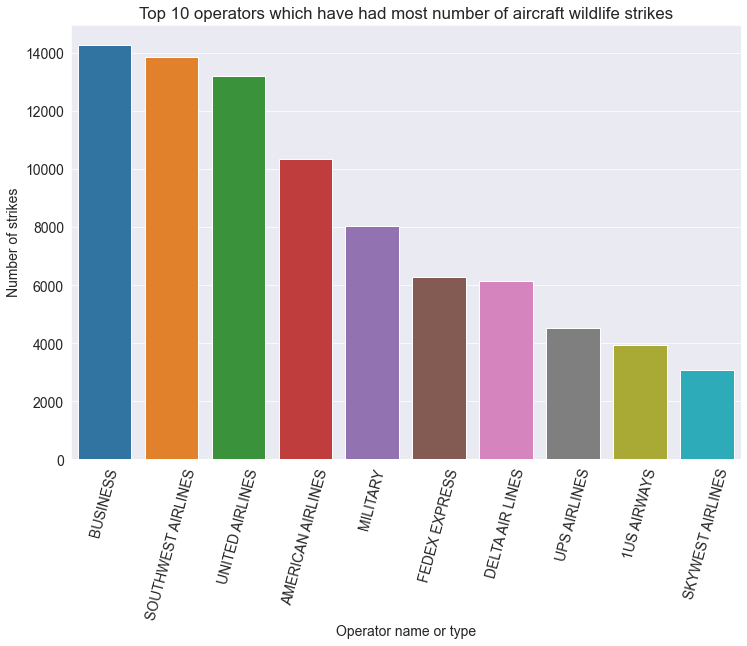

In [14]:
plt.xticks(rotation = 75)
plt.title('Top 10 operators which have had most number of aircraft wildlife strikes')
ax = sns.barplot(x = top_operators.index, y = top_operators);
ax.set_ylabel('Number of strikes');
ax.set_xlabel('Operator name or type');

### 2. We want to figure out the airports which witnessed the most aircraft wildlife strikes.

In [15]:
strikes_df.Airport.value_counts()

UNKNOWN                            18570
DENVER INTL AIRPORT                 5434
DALLAS/FORT WORTH INTL ARPT         4828
CHICAGO O'HARE INTL ARPT            3963
JOHN F KENNEDY INTL                 3287
                                   ...  
FAIRFIELD COUNTY ARPT                  1
HARDIN COUNTY                          1
RED BLUFF MUNICIPAL ARPT               1
STATESBORO -BULLOCH COUNTY ARPT        1
CEDAR MILLS                            1
Name: Airport, Length: 2226, dtype: int64

As most of the airport names are unknown, we consider the next 10 airports for drawing a bar chart.

In [16]:
top_airports = strikes_df.Airport.value_counts()[1:].head(10)
top_airports

DENVER INTL AIRPORT            5434
DALLAS/FORT WORTH INTL ARPT    4828
CHICAGO O'HARE INTL ARPT       3963
JOHN F KENNEDY INTL            3287
MEMPHIS INTL                   2834
SACRAMENTO INTL                2607
SALT LAKE CITY INTL            2315
ORLANDO INTL                   2142
LA GUARDIA ARPT                2059
PHILADELPHIA INTL              2045
Name: Airport, dtype: int64

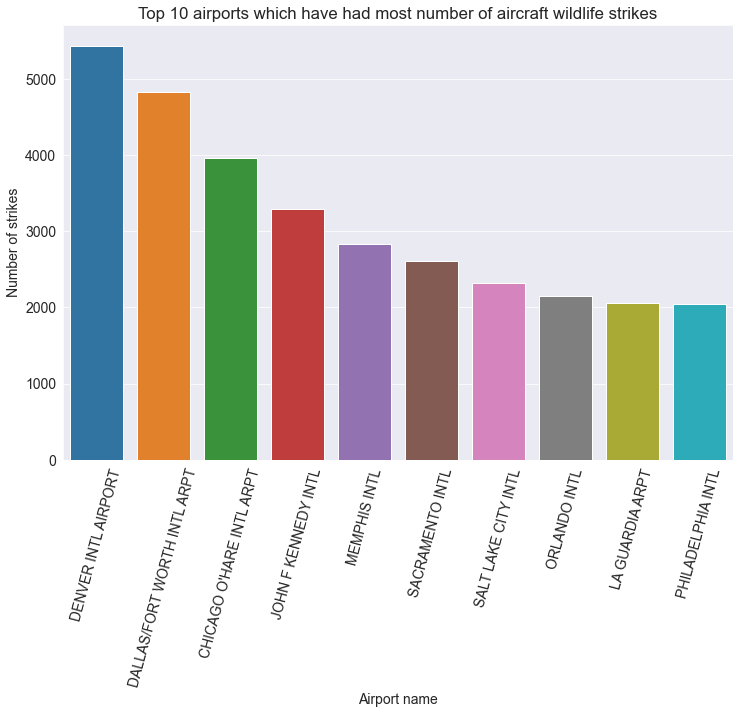

In [17]:
plt.xticks(rotation = 75)
plt.title('Top 10 airports which have had most number of aircraft wildlife strikes')
ax = sns.barplot(x = top_airports.index, y = top_airports);
ax.set_xlabel('Airport name');
ax.set_ylabel('Number of strikes');

### 3. Now we want to find out the distribution of precipitation (rain, fog, snow, none) when the aircraft wildlife strikes happened.

In [18]:
prec_series = strikes_df.Precipitation.dropna().value_counts()
prec_series

NONE               80512
RAIN                5270
FOG                 1952
SNOW                 313
FOG, RAIN            239
RAIN, SNOW            19
FOG, SNOW             12
FOG, RAIN, SNOW        5
Name: Precipitation, dtype: int64

We see that multiple types of precipitation can happen at the same time. For ex: Rain and Fog. So we split these multi-columns into individual columns using the function defined below.

In [19]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option.strip())
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [20]:
precipitation_df = split_multicolumn(strikes_df.Precipitation)
precipitation_df

,NONE,FOG,RAIN,SNOW,RAIN,SNOW
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
174099,True,False,False,False,False,False
174100,True,False,False,False,False,False
174101,True,False,False,False,False,False
174102,True,False,False,False,False,False


In [21]:
precipitation_totals = precipitation_df.sum().sort_values(ascending=False).drop_duplicates() # also dropping duplicates as columns are repeated
precipitation_totals

NONE    80512
RAIN     5289
FOG      2208
SNOW      313
dtype: int64

Now that we have the individual number of values, we can plot their distribution as a treemap using the squarify library.

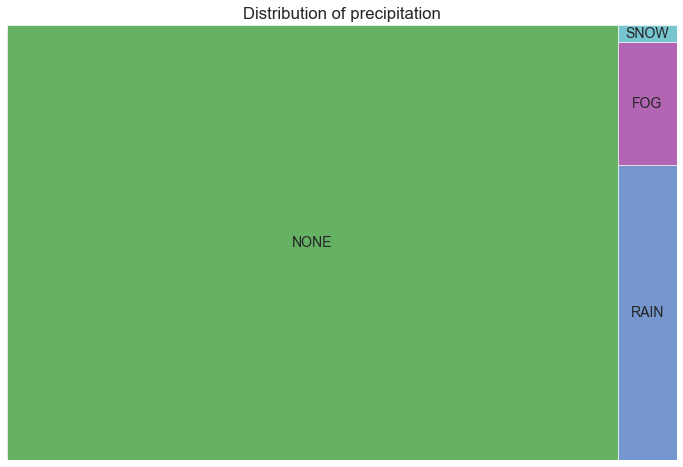

In [22]:
import squarify
color = ['green','#1C51B0','purple','#1C9FB0']
squarify.plot(sizes=precipitation_totals, label=precipitation_totals.index , color=color, alpha=0.6) 
plt.axis('off')
plt.title('Distribution of precipitation')
plt.show()

The above treemap shows how precipitation occurred among all the aircraft wildlife strikes. Note: Multiple forms of precipitation could have happened simultaneously.

### 4. We want to see the trend of the cumulative number of aircraft wildlife strikes happening over the months.

In [23]:
months_series = strikes_df['Incident Month'].value_counts().sort_index()
months_series

1      6078
2      5587
3      8745
4     12687
5     16868
6     14479
7     22068
8     24494
9     23633
10    20954
11    11600
12     6911
Name: Incident Month, dtype: int64

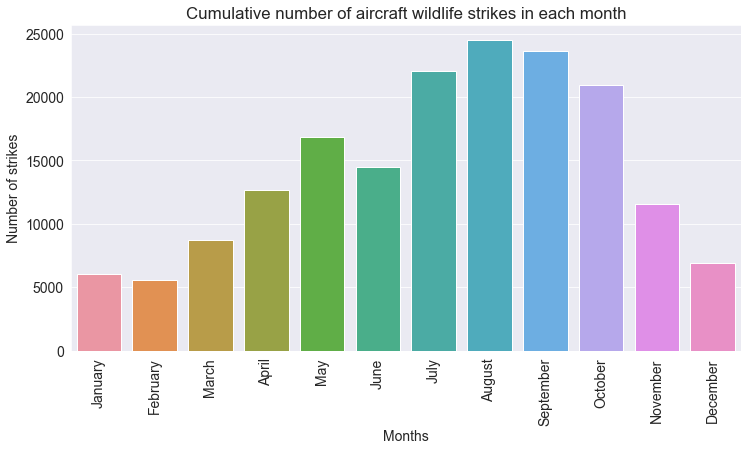

In [24]:
plt.figure(figsize=(12, 6))
plt.title('Cumulative number of aircraft wildlife strikes in each month')
ax = sns.barplot(x = months_series.index, y = months_series)
ax.set_xlabel('Months')
ax.set_ylabel('Number of strikes')
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July' ,'August' ,'September', 'October', 'November', 'December' ], 
                   rotation = 'vertical');

Therefore,we can see that the most aircraft wildlife strikes happened in the month of August, followed by September and July. 

### 5. We want to see the trend of the number of aircraft wildlife strikes happening over the years.

In [25]:
years_series = strikes_df['Incident Year'].value_counts().sort_index()
years_series

1990     2099
1991     2672
1992     2816
1993     2849
1994     2938
1995     2989
1996     3215
1997     3651
1998     4131
1999     5385
2000     6351
2001     6216
2002     6659
2003     6485
2004     7122
2005     7591
2006     7750
2007     7993
2008     7993
2009     9848
2010     9934
2011    10363
2012    11264
2013    11666
2014    13976
2015    10148
Name: Incident Year, dtype: int64

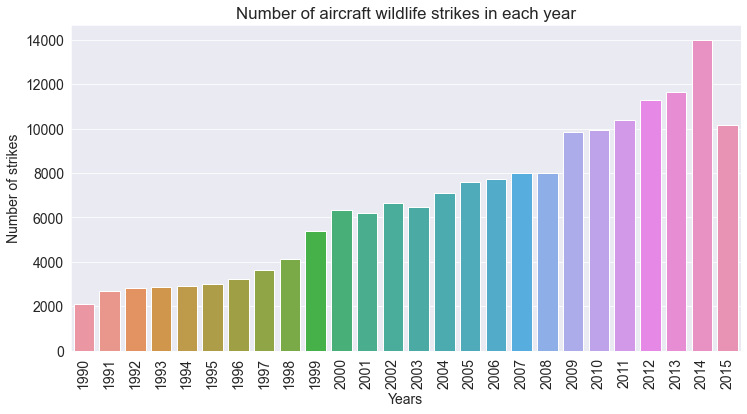

In [26]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x = years_series.index, y = years_series);
plt.title('Number of aircraft wildlife strikes in each year');
ax.set_xlabel('Years');
ax.set_ylabel('Number of strikes');
plt.xticks(rotation = 90);

We see that the trend mostly continues to rise over the years with 2014 witnessing the most number of aircraft wildlife strikes.

### 6. We want to plot the distribution of the height of the aircraft when it strikes with wildlife (considering height only less than 1000 feet).

In [27]:
height_vs_speed_df = strikes_df[['Height', 'Speed', 'Flight Phase', 'Visibility']].dropna()
height_vs_speed_df

,Height,Speed,Flight Phase,Visibility
3,200.0,138.0,APPROACH,DAY
4,100.0,200.0,CLIMB,DAY
10,60.0,150.0,APPROACH,DAY
12,0.0,100.0,TAKEOFF RUN,NIGHT
13,1400.0,200.0,CLIMB,DAY
...,...,...,...,...
174094,10.0,140.0,CLIMB,NIGHT
174095,1300.0,120.0,EN ROUTE,DAY
174098,2000.0,210.0,CLIMB,NIGHT
174100,5000.0,250.0,APPROACH,DAY


As the average cruising speed for a passenger jet is around 575 miles per hour, we'll remove rows where the speed of the aircraft exceeds this value.

In [28]:
height_vs_speed_df.drop(height_vs_speed_df[height_vs_speed_df.Speed > 575].index, inplace=True)
height_vs_speed_df

,Height,Speed,Flight Phase,Visibility
3,200.0,138.0,APPROACH,DAY
4,100.0,200.0,CLIMB,DAY
10,60.0,150.0,APPROACH,DAY
12,0.0,100.0,TAKEOFF RUN,NIGHT
13,1400.0,200.0,CLIMB,DAY
...,...,...,...,...
174094,10.0,140.0,CLIMB,NIGHT
174095,1300.0,120.0,EN ROUTE,DAY
174098,2000.0,210.0,CLIMB,NIGHT
174100,5000.0,250.0,APPROACH,DAY


We see that one outlier value was removed.

In [29]:
height_vs_speed_df.describe()

,Height,Speed
count,67271.000000,67271.000000
mean,995.835576,141.472834
std,1878.091146,45.794717
min,0.000000,0.000000
25%,0.000000,120.000000
50%,100.000000,137.000000
75%,1000.000000,160.000000
max,25000.000000,500.000000


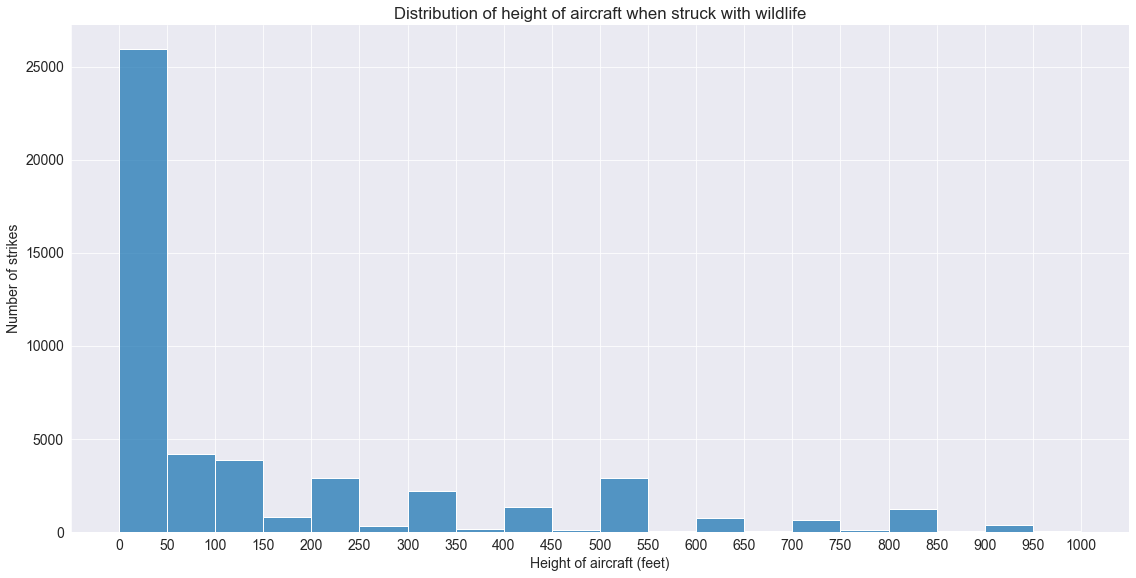

In [30]:
sns.displot(x = height_vs_speed_df[height_vs_speed_df.Height < 1000]['Height'], 
            binwidth=50, 
            height=8, 
            aspect=2).set(title = 'Distribution of height of aircraft when struck with wildlife', 
                          ylabel = 'Number of strikes', 
                          xlabel = 'Height of aircraft (feet)',
                          xticks = np.arange(0,1050,50));

We can observe from the above histogram that most of the wildlife strikes happened when the aircraft was at a height of up to 50 feet from the ground. 

### 7.Similarly, now we plot the distribution of the speed of the aircraft when it strikes with wildlife (considering speed only less than 350 miles per hour).

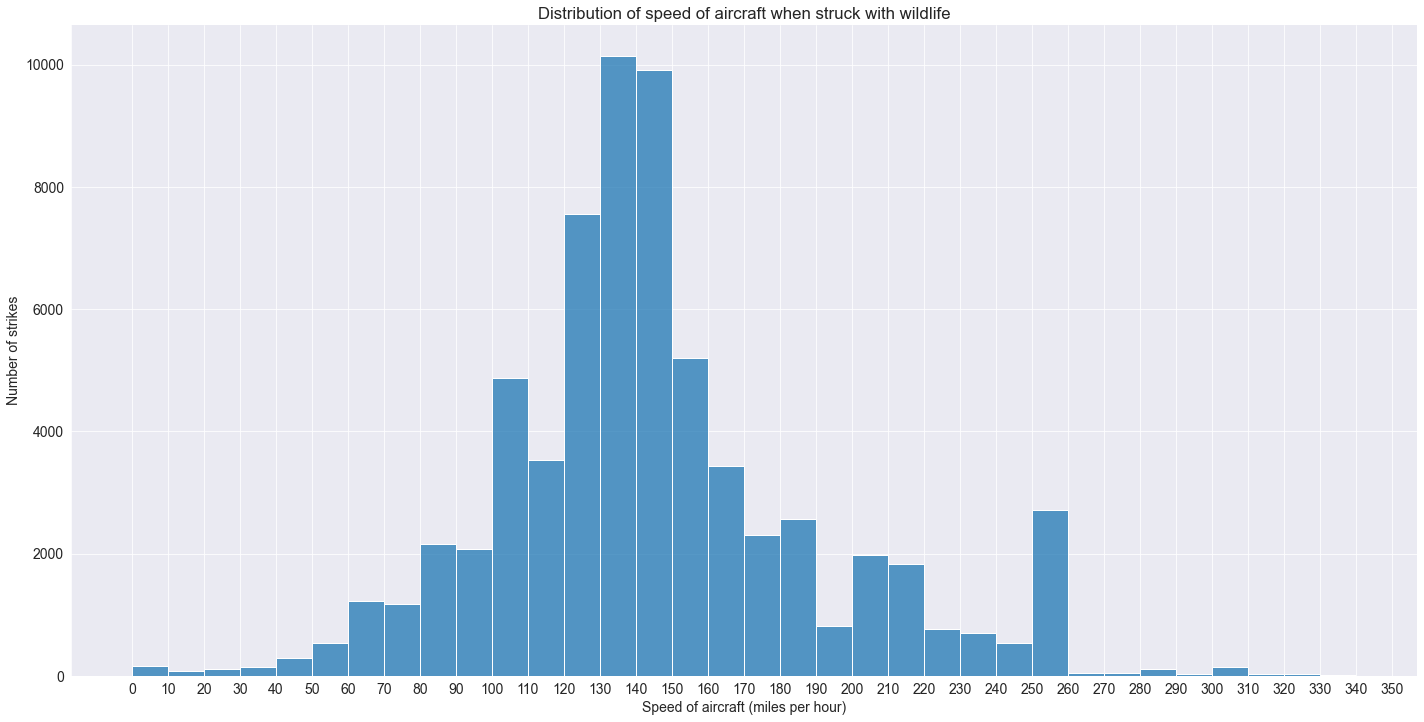

In [31]:
ax = sns.displot(x = height_vs_speed_df[height_vs_speed_df.Speed < 350]['Speed'], 
                 binwidth=10,
                 height=10,
                 aspect=2).set(title = 'Distribution of speed of aircraft when struck with wildlife', 
                               xlabel = 'Speed of aircraft (miles per hour)', 
                               ylabel = 'Number of strikes',
                               xticks = np.arange(0,360,10));

We see that most of the wildlife strikes happened when the aircraft was at a speed of 130 to 140 miles per hour.

# Asking and Answering Questions

## 1. Which parts of the aircraft (excluding the main aircraft body) were damaged the most?

In [32]:
most_damaged_parts_df.head()

,Radome Damage,Nose Damage,Propeller Damage,Engine1 Damage,Engine3 Damage,Engine2 Damage,Engine4 Damage,Wing or Rotor Damage,Fuselage Damage,Landing Gear Damage,Windshield Damage,Lights Damage,Other Damage,Tail Damage
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
most_damaged_parts_df.sum()

Radome Damage           1593
Nose Damage             1145
Propeller Damage         579
Engine1 Damage          2515
Engine3 Damage           169
Engine2 Damage          2023
Engine4 Damage            74
Wing or Rotor Damage    4180
Fuselage Damage          824
Landing Gear Damage     1012
Windshield Damage       1037
Lights Damage            734
Other Damage            1565
Tail Damage              727
dtype: int64

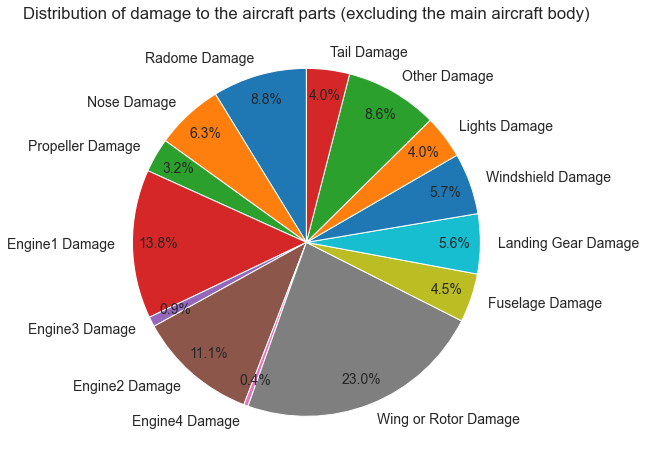

In [34]:
plt.title('Distribution of damage to the aircraft parts (excluding the main aircraft body)')
plt.pie(most_damaged_parts_df.sum(), 
        labels = most_damaged_parts_df.sum().index,
        startangle= 90, 
        labeldistance = 1.1,
        pctdistance = 0.85,
        autopct='%1.1f%%'
        );

The above pie chart shows the distribution of damage caused to the aircraft (excluding the main aircraft body). We observe that when aircraft wildlife strikes happened, the damage was done to the wing or rotor parts the most number of times.

## 2. Which bird species caused the most aircraft wildlife strikes?

In [35]:
known_species_df = strikes_df[~strikes_df['Species Name'].str.contains("UNKNOWN", na=False)]
known_species_df

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0
5,129734,1990,1,4,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174095,366041,2015,9,30,BUS,BUSINESS,EC130,B,33A,NaN,...,0,0,0,0,0,0,0,0,0,0
174097,365836,2015,9,30,ASQ,EXPRESSJET AIRLINES,EMB-135,A,332,13,...,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49,...,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10,...,1,0,0,0,0,0,0,0,0,0


In [36]:
known_species_names = known_species_df['Species Name'].value_counts().head(20)
known_species_names

MOURNING DOVE         7653
GULL                  6580
KILLDEER              4562
AMERICAN KESTREL      4476
BARN SWALLOW          4215
HORNED LARK           3952
EUROPEAN STARLING     3915
SPARROW               3152
ROCK PIGEON           2893
RED-TAILED HAWK       2254
EASTERN MEADOWLARK    1829
CANADA GOOSE          1574
RING-BILLED GULL      1531
CLIFF SWALLOW         1485
HAWK                  1313
BLACKBIRD             1281
HERRING GULL          1199
BARN OWL              1118
WESTERN MEADOWLARK    1072
SWALLOW               1053
Name: Species Name, dtype: int64

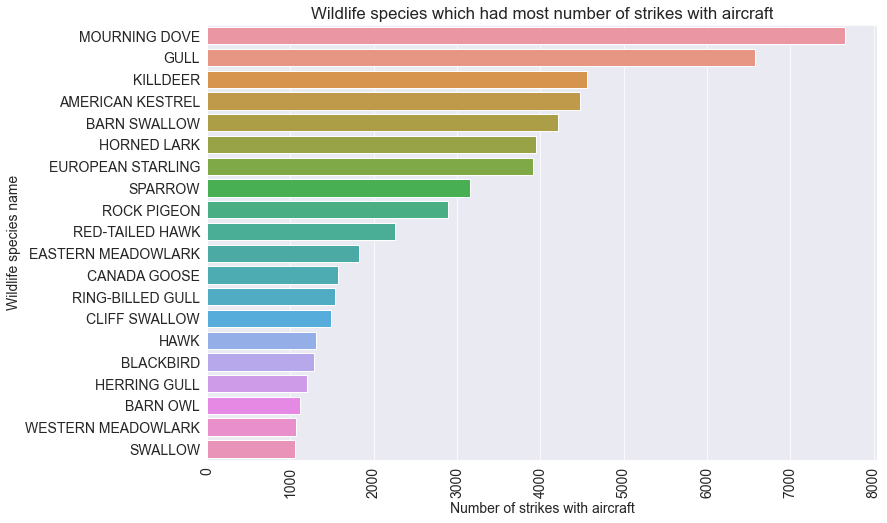

In [37]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation = 90);
ax = sns.barplot(x = known_species_names, y = known_species_names.index);
ax.set_xlabel('Number of strikes with aircraft');
ax.set_ylabel('Wildlife species name');
ax.set_title('Wildlife species which had most number of strikes with aircraft');

We observe that Mourning Doves caused the most number of aircraft wildlife strikes among the known species, followed by Gull and Killdeer.

## 3. Aircrafts with what number of engines had the most number of wildlife strikes?

In [38]:
strikes_df['Engines'].nunique()

4

In [39]:
engines_df = strikes_df['Engines'].value_counts().sort_index()
engines_df

1.0      7471
2.0    108155
3.0      8619
4.0      3097
Name: Engines, dtype: int64

As the number of engines should be a whole number, we change type of the index to integers.

In [40]:
engines_df.index = engines_df.index.astype(int)
engines_df

1      7471
2    108155
3      8619
4      3097
Name: Engines, dtype: int64

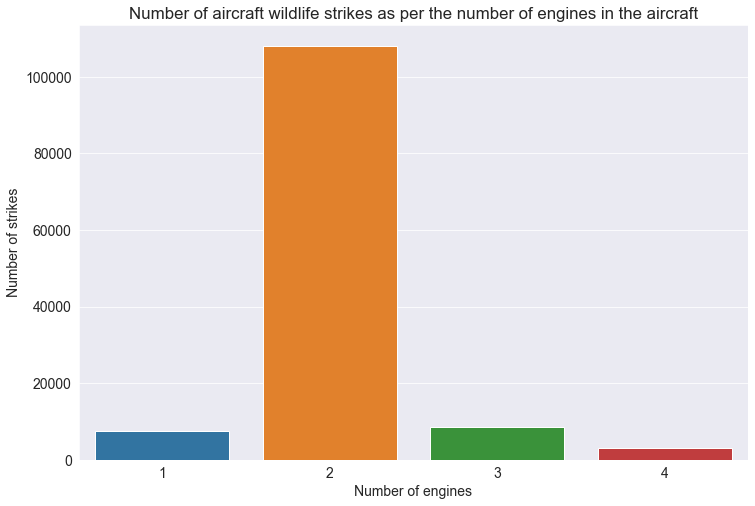

In [41]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x = engines_df.index, y = engines_df);
ax.set_ylabel('Number of strikes');
ax.set_xlabel('Number of engines');
ax.set_title('Number of aircraft wildlife strikes as per the number of engines in the aircraft');

We observe that aircrafts which had 2 engines have had most strikes with wildlife in the past. Another visualization for the above data can be shown as the treemap drawn below.

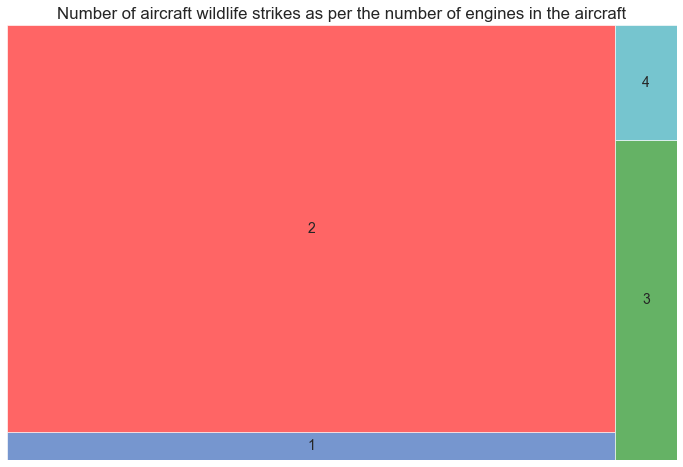

In [42]:
color = ['#1C51B0','red','green','#1C9FB0']
squarify.plot(sizes = engines_df, label = engines_df.index , color = color, alpha=0.6) 
plt.axis('off')
plt.title('Number of aircraft wildlife strikes as per the number of engines in the aircraft')
plt.show()

## 4. Which flight phase witnessed the most aircraft wildlife strikes?

In [43]:
phase_series = strikes_df['Flight Phase'].value_counts()
phase_series

APPROACH        48275
TAKEOFF RUN     21953
LANDING ROLL    20762
CLIMB           19692
DESCENT          3174
EN ROUTE         2989
LANDING           626
TAXI              397
DEPARTURE         369
LOCAL             316
ARRIVAL           154
PARKED             95
Name: Flight Phase, dtype: int64

As the values that we have to plot extremely vary, we are going to plot them with a broken y-axis using [Matplotlib's broken axes implementation](https://matplotlib.org/3.3.0/gallery/subplots_axes_and_figures/broken_axis.html).

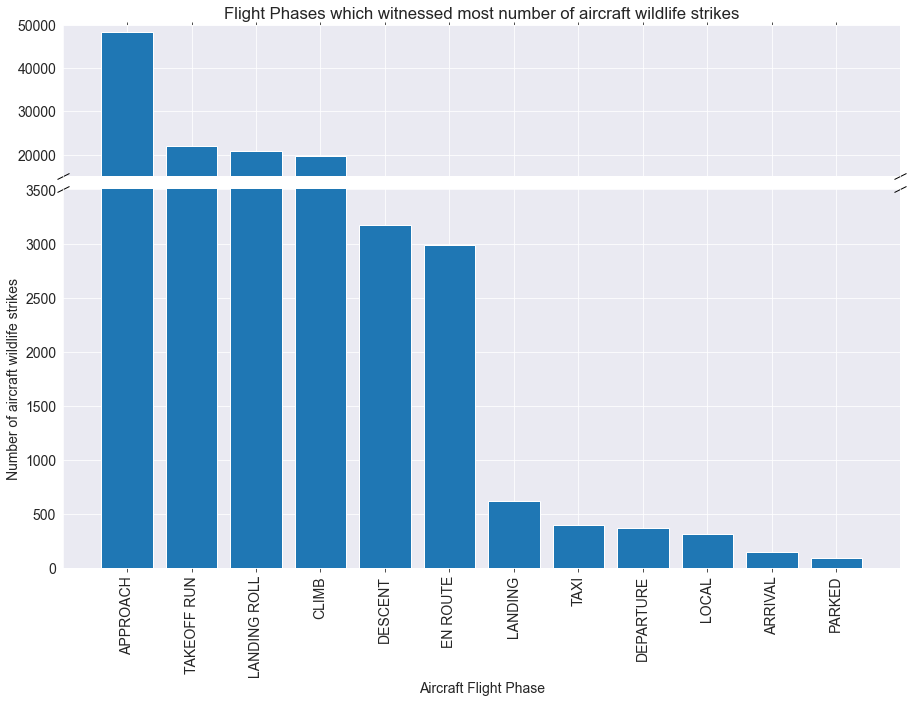

In [44]:
# Let's 'break' or 'cut-out' the y-axis into two portions - use the top (ax1) for the outliers, and the bottom (ax2) for the 
# details of the majority of our data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,10), gridspec_kw={'height_ratios': [2, 5]})
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes
ax1.bar(phase_series.index, phase_series)
ax2.bar(phase_series.index, phase_series)

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(15000, 50000)  # outliers only
ax2.set_ylim(0, 3500)  # most of the data

# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)


ax1.set_title('Flight Phases which witnessed most number of aircraft wildlife strikes')
ax2.set_xlabel('Aircraft Flight Phase')
plt.ylabel('Number of aircraft wildlife strikes')
plt.xticks(rotation = 90)

plt.show()

## 5. Is there any kind of relationship between the height and speed of the aircraft when the strike happens?

In [45]:
height_vs_speed_df[['Height','Speed']]

,Height,Speed
3,200.0,138.0
4,100.0,200.0
10,60.0,150.0
12,0.0,100.0
13,1400.0,200.0
...,...,...
174094,10.0,140.0
174095,1300.0,120.0
174098,2000.0,210.0
174100,5000.0,250.0


Here we have plotted the relationship between the height and speed of the aircraft when the strike happens in two variants by changing the hue parameter; one categorized by the flight phase and the other by visibility.

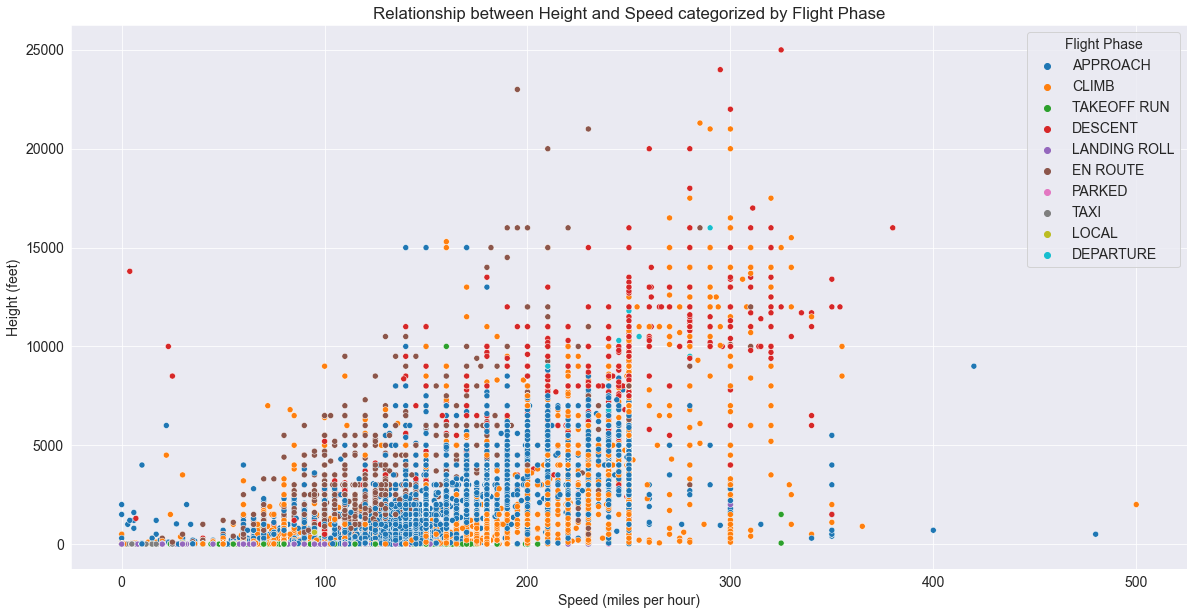

In [46]:
plt.figure(figsize=(20, 10))
plt.title('Relationship between Height and Speed categorized by Flight Phase')
ax = sns.scatterplot(x = 'Speed', y = 'Height', data = height_vs_speed_df, hue = 'Flight Phase')
ax.set_ylabel('Height (feet)');
ax.set_xlabel('Speed (miles per hour)');

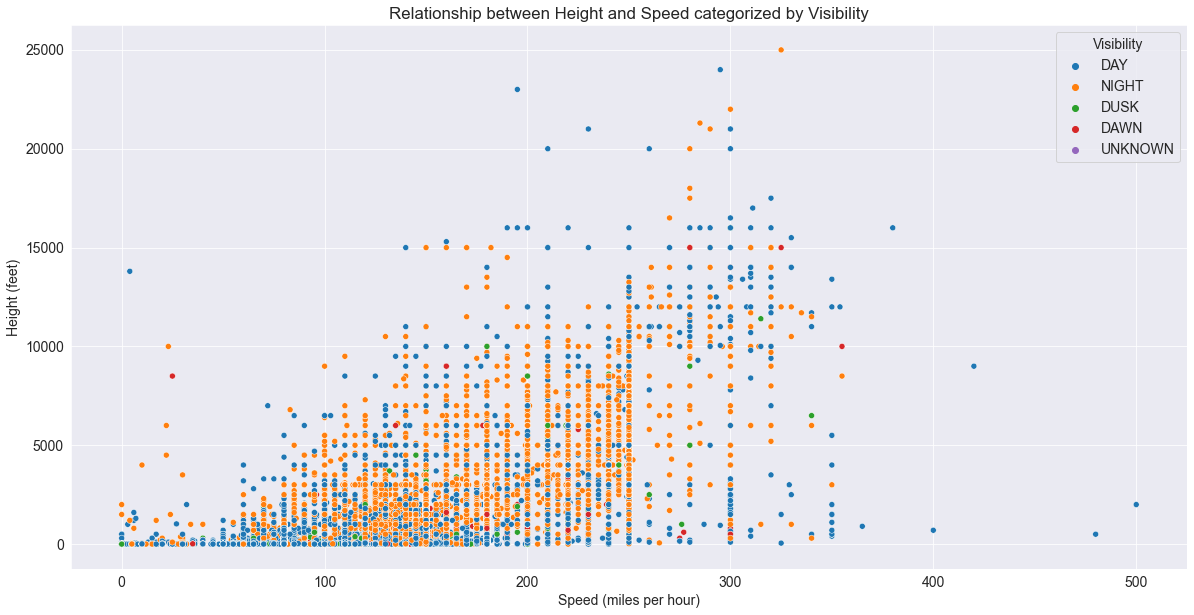

In [47]:
plt.figure(figsize=(20, 10))
plt.title('Relationship between Height and Speed categorized by Visibility')
ax = sns.scatterplot(x = 'Speed', y = 'Height', data = height_vs_speed_df, hue = 'Visibility')
ax.set_ylabel('Height (feet)');
ax.set_xlabel('Speed (miles per hour)');

In [48]:
# calculate Pearson's correlation between two variables
from scipy.stats import pearsonr
corr, _ = pearsonr(height_vs_speed_df.Height, height_vs_speed_df.Speed)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.684


In [49]:
# calculate the spearmans's correlation between two variables
from scipy.stats import spearmanr
# calculate spearman's correlation
corr, _ = spearmanr(height_vs_speed_df.Height, height_vs_speed_df.Speed)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.654


## Inferences and Conclusion

Private business operators had the most aircraft wildlife strikes incidents. 

Denver, Dallas and Chicago airports witnessed most aircraft wildlife strikes. This could be due to a geographical reason where a multitude of wildlife is present.

Other than the incidences where there was no precipitation, rain could be a factor in the occurrence of aircraft wildlife strikes.

August, September and July had most aircraft wildlife strikes. This could be due to seasonal migration of birds or simply because more number of people travel during those months.

There is a gradual increase in the number of aircraft wildlife strikes over the years. This could be due to the fact that more and more people are now accepting airways as a cheap and safer way to travel. Thus the number of wildlife strikes have also increased along with the number of flights operated.

We observe that an aircraft is most likely to strike with wildlife when it is at a height of up to 50 feet from the ground. 

Similarly, we see that most of the wildlife strikes happened when the aircraft was at a speed of 130 to 140 miles per hour. The histogram of speed distribution as per the number of aircraft wildlife strikes forms a somewhat normal distribution with the mean speed being about 141 miles per hour and the standard deviation being about 46 miles per hour.

Excluding the main aircraft body, most damage (23%) was caused to the wings/rotor parts. This could suggest that these parts are most susceptible to wildlife strikes (after the main body).

Morning Doves and Gulls caused the most aircraft wildlife strikes. There are also a lot of wildlife which could not be identified.

Most aircrafts who struck with wildlife had 2 engines. This could simply be because the number of aircrafts with 2 engines is high.

Most of the wildlife strikes happened when the aircraft was approaching the airport. This could suggest that approaching aircraft cause the birds to panic and strike with it.

We observe that there is a moderately positive relationship between the height and speed of the aircraft when the wildlife strike occurs.

## References and Future Work

In this project, we implemented Matplotlib's way of creating broken axes. The other two methods could also be used in future work:
- https://matplotlib.org/3.3.0/gallery/subplots_axes_and_figures/broken_axis.html
- https://pypi.org/project/plotinpy/
- https://github.com/bendichter/brokenaxes

We plotted treemaps using the squarify library:
- https://pypi.org/project/squarify/
- https://jingwen-z.github.io/data-viz-with-matplotlib-series5-treemap/

Future work can include analyzing the aircraft wildlife strikes according to the visibility.

In [50]:
project_name = "aircraft-wildlife-strikes"

In [51]:
!pip install jovian --upgrade -q

In [52]:
import jovian

In [ ]:
jovian.commit(project=project_name, files = ['database.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
